# Calculating Maximum Drawdown & Maximum Drawdown Duration

Uses the same strategy from the previous workbook, calculating_sharpe

In [10]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%store -r netRet

In [7]:
def calculateMDD(cumret):
    """
    Calculates the max drawdown and max drawdown duration of a cumulative return series.
    :param cumret: Cumulative return series, must be compounded cumulative returns.
    """
    highwatermark = np.zeros(len(cumret))
    drawdown = np.zeros(len(cumret))
    duration = np.zeros(len(cumret))
    for t in np.arange(1, len(cumret)):
        highwatermark[t] = max(highwatermark[t - 1], cumret[t])
        drawdown[t] = (1 + cumret[t]) / (1 + highwatermark[t]) - 1
        duration[t] = 0 if drawdown[t] == 0 else duration[t - 1] + 1
    maxdd, i=np.min(drawdown), np.argmin(drawdown)
    maxddd = np.max(duration)
    return maxdd, maxddd, i
    

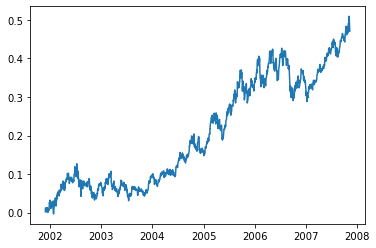

In [11]:
cumret = np.cumprod(1 + netRet) - 1  # where netRet is the net return series from the previous notebook
plt.plot(cumret)

In [13]:
maxDrawdown, maxDrawdownDuration, startDrawdownDay = calculateMDD(cumret.values)
print("Max Drawdown: {:.2%}".format(maxDrawdown))
print("Max Drawdown Duration: {} days".format(maxDrawdownDuration))
print("Start of Max Drawdown: Day {}".format(startDrawdownDay))

Max Drawdown: -9.69%
Max Drawdown Duration: 498.0 days
Start of Max Drawdown: Day 1290
